# Homework w03d02

This question involves the use of multiple linear regression on the Auto data set.
1. Produce a scatterplot matrix which includes all of the variables in the data set.
1. Compute the matrix of correlations between the variables using either the function you created in the previous exercises or with pd.corr(). You will need to exclude the name variable, which is qualitative.
1. Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Produce a summary of the results. Comment on the output. For instance:
     - Is there a relationship between the predictors and the response?
     - Which predictors appear to have a statistically significant relationship to the response?
     - What does the coefficient for the year variable suggest?
1. Fit linear regression models with interaction effects (for example y = intercept + x1 + x2 + x1 * x2 ), see also http://www.theanalysisfactor.com/interpreting-interactions-in-regression/. Do any interactions appear to be statistically significant?
1. Try a few different transformations of the variables, such as $\log{X}$, $\sqrt{X}$, $X^2$ and try fits on them. Comment on your findings.

In [21]:
# load libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# read in data
df = pd.read_csv('../day1/Auto.csv')
# drop missing values and convert datatype
df.dropna(inplace=True)
df.drop(list(df.index[df.horsepower=='?']),inplace=True)
df.horsepower = df.horsepower.astype(int)

### 1. Produce a scatterplot matrix which includes all of the variables in the data set.

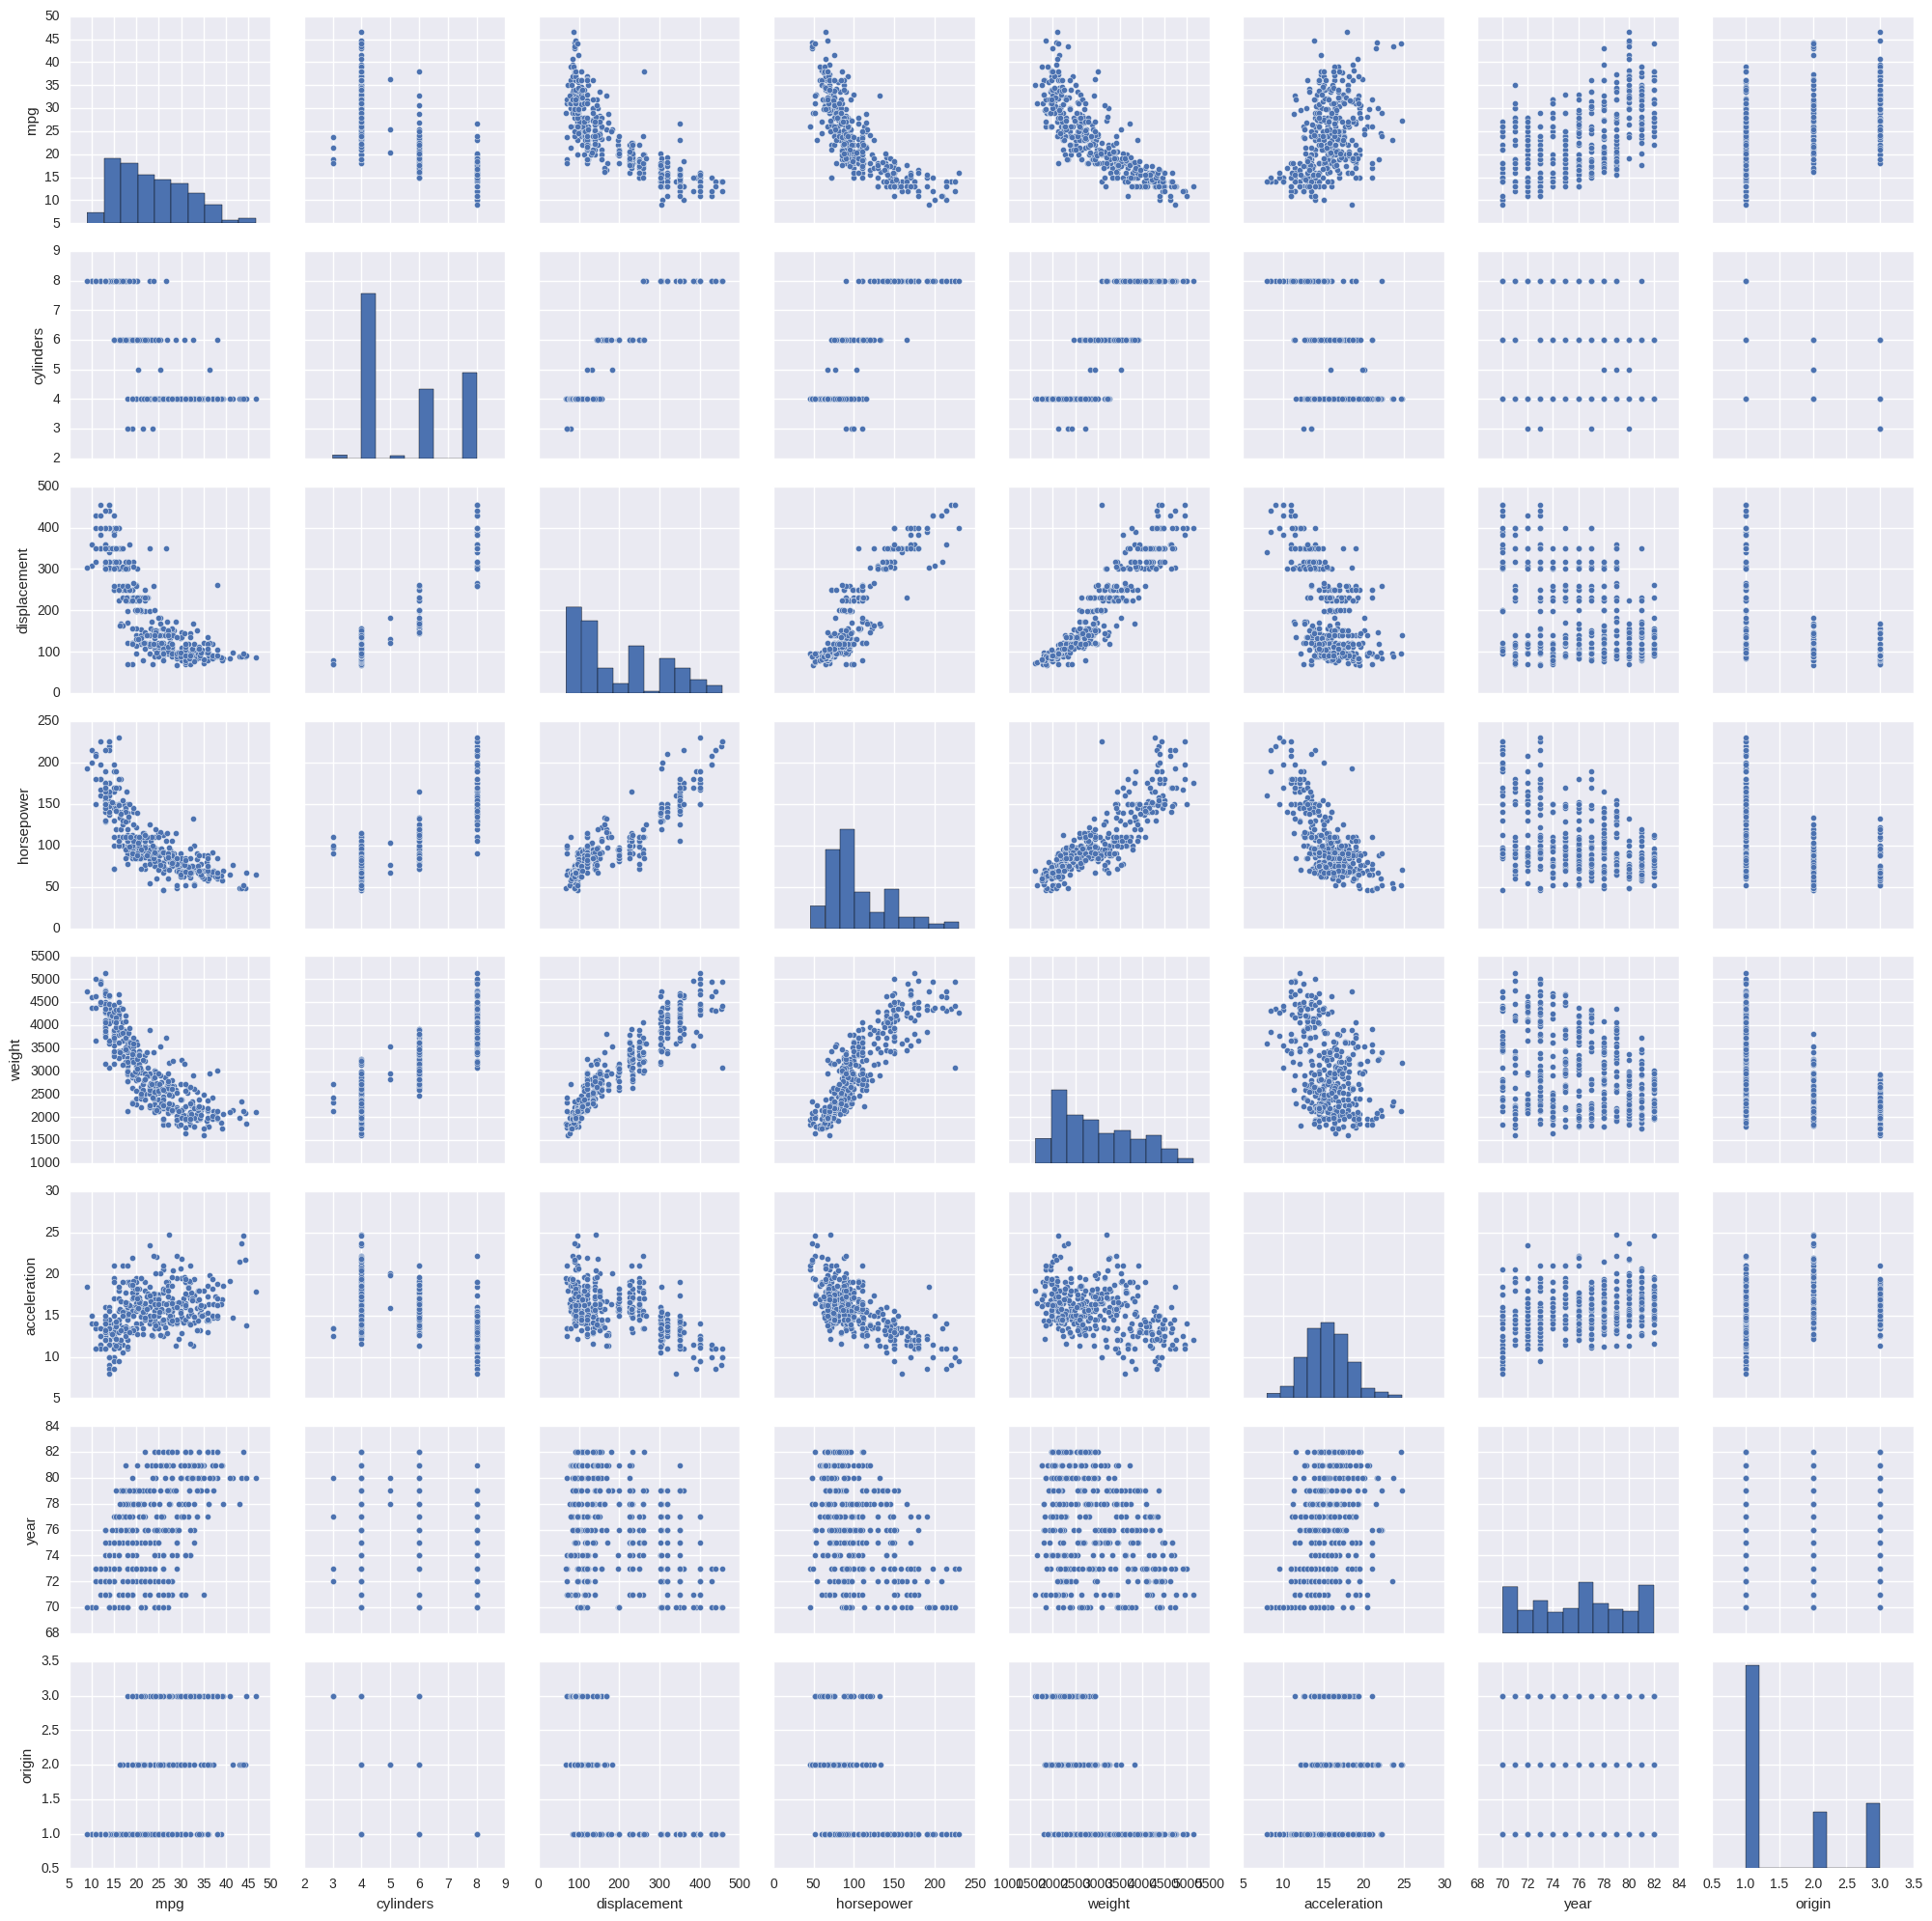

In [7]:
sns.pairplot(df)
plt.show()

### 2. Compute the matrix of correlations between the variables using either the function you created in the previous exercises or with pd.corr(). You will need to exclude the name variable, which is qualitative.

In [22]:
df.ix[:,:-1].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### 3. Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors

In [23]:
import statsmodels.formula.api as smf
mod= smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',data=df)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 25 Oct 2016   Prob (F-statistic):          2.04e-139
Time:                        17:41:58   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
year             0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our model has an R squared of 0,821, which is high. Of course this is not enough to draw a conclusion, but this is an indicate of a potential good model fit. We would need to study the distribution of residuals, as well as validate the model on unknown data to push this verification further

Also we have a few variables highly correlated which might introduce some high variance, so we should ideally remove some of them from our model (for instance out of cyclinder, displacement and horsepower, only one should be kept).

We observe that the coefficient of some of the variables has a statistical significance if we set our threshold to 0,05.

There are displacement, weight, year and origin.

The coefficient for year is positive, which indicates that as the year increases (more recent car), the mpg increases. More precisely, for every additional year, the mpg increases by 0,75, all other parameters held equal.

### 4. Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [31]:
import statsmodels.formula.api as smf
mod= smf.ols('mpg ~ horsepower + weight + weight*horsepower + year',data=df)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     581.5
Date:                Tue, 25 Oct 2016   Prob (F-statistic):          3.74e-162
Time:                        18:01:02   Log-Likelihood:                -979.51
No. Observations:                 392   AIC:                             1969.
Df Residuals:                     387   BIC:                             1989.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             3.5769      3.911      0.915      0.361        -4.113    11.266
horsepower           -0.2236      0.021    -10.837      0.000        -0.264    -0.183
weight               -0.0119      0.001    -20.198      0.000        -0.013    -0.011
weight:horsepower   5.79e-05   5.02e-06     11.534      0.000       4.8e-05  6.78e-05
year                  0.7749      0.045     17.190      0.000         0.686     0.863
==============================================================================
Omnibus:                       43.561   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.451
Skew:                           0.676   Prob(JB):                     4.13e-17
Kurtosis:                       4.671   Cond. No.                     1.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have statistical significance for the interaction between weight and horsepower

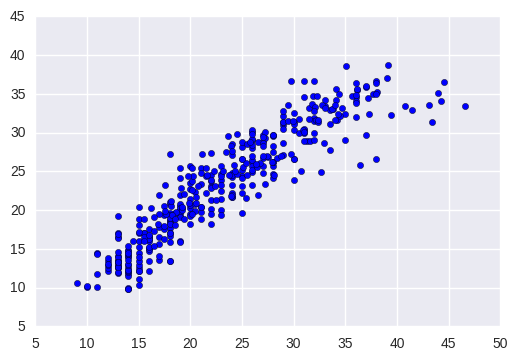

In [33]:
plt.scatter(df["mpg"],res.predict())
plt.show()

### 5. Try a few different transformations of the variables

In [32]:
import statsmodels.formula.api as smf
mod= smf.ols('mpg ~ horsepower + weight + I(weight**2) + year',data=df)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     557.6
Date:                Tue, 25 Oct 2016   Prob (F-statistic):          3.81e-159
Time:                        18:02:24   Log-Likelihood:                -986.53
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     387   BIC:                             2003.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          4.9966      4.071      1.227      0.220        -3.008    13.002
horsepower        -0.0186      0.008     -2.220      0.027        -0.035    -0.002
weight            -0.0213      0.001    -14.858      0.000        -0.024    -0.019
I(weight ** 2)  2.424e-06   2.26e-07     10.711      0.000      1.98e-06  2.87e-06
year               0.7991      0.046     17.344      0.000         0.709     0.890
==============================================================================
Omnibus:                       65.818   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.005
Skew:                           0.861   Prob(JB):                     4.40e-33
Kurtosis:                       5.481   Cond. No.                     2.95e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see again what seems to be a pretty good fit.

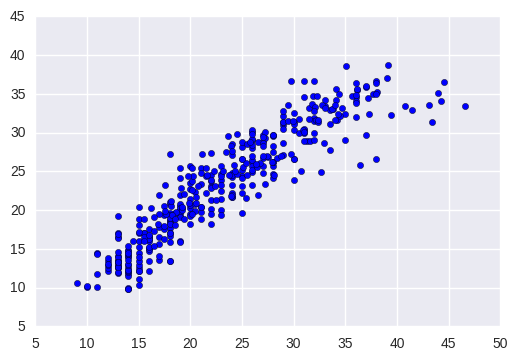

In [34]:
plt.scatter(df["mpg"],res.predict())
plt.show()